In the catchment_area notebook, we have successfully extracted one shopping centre's requested income information. In this section, the goal is to continue this data wrangling process for the rest of shopping centre locations. Instead of repeating the process manually, we try to create some loops to process the data automatically.

Here are good resources discussed the importance of data wrangling: <br/>
[What Is Data Wrangling? Benefits, Tools, Examples and Skills](https://www.simplilearn.com/data-wrangling-article#:~:text=Data%20wrangling%20is%20the%20process%20of%20removing%20errors%20and%20combining,analysis%20is%20becoming%20increasingly%20necessary.)

# 1. transform location information into geometry.

First, we read the pre-prepared shopping malls location file 'shops_geo.csv' into Python.<br>
As you can see, the latitude and longditude are in separate columns. We need to convert the latitude and longtitude columns into one geometry column. The new geometry column then can be used for sorting buffers.<br>
[How to convert latitude/longtitude columns in CSV to Geometry Column using Python?](https://shakasom.medium.com/how-to-convert-latitude-longtitude-columns-in-csv-to-geometry-column-using-python-4219d2106dea)

In [2]:
# importing libraries
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import folium

In [3]:
shops_geo = pd.read_csv('shops_geo.csv')

In [4]:
shops_geo.head()

,ID,Name,Address,Suburb,State,ZIP Code,Country,Full address,latitude,longitude
0,ID029,Airport West,29-35 LOUIS STREET,AIRPORT WEST,VICTORIA,3042,Australia,"29-35 LOUIS STREET, AIRPORT WEST VIC 3042",-37.713985,144.885268
1,ID001,Belconnen,BENJAMIN WAY,BELCONNEN,AUSTRALIAN CAPITAL TERRITORY,2617,Australia,"BENJAMIN WAY, BELCONNEN ACT 2617",-35.238416,149.065957
2,ID003,Bondi Junction,500 OXFORD STREET,BONDI JUNCTION,NEW SOUTH WALES,2022,Australia,"500 OXFORD STREET, BONDI JUNCTION NSW 2022",-33.891289,151.250815
3,ID036,Booragoon,125 RISELEY STREET,BOORAGOON,WESTERN AUSTRALIA,6154,Australia,"125 RISELEY STREET, BOORAGOON WA 6154",-32.034080,115.835470
4,ID004,Burwood,100 BURWOOD ROAD,BURWOOD,NEW SOUTH WALES,2134,Australia,"100 BURWOOD ROAD, BURWOOD NSW 2134",-33.874545,151.105889


In [5]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(shops_geo['longitude'], shops_geo['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(shops_geo, crs=crs, geometry=geometry)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
gdf.head()

,ID,Name,Address,Suburb,State,ZIP Code,Country,Full address,latitude,longitude,geometry
0,ID029,Airport West,29-35 LOUIS STREET,AIRPORT WEST,VICTORIA,3042,Australia,"29-35 LOUIS STREET, AIRPORT WEST VIC 3042",-37.713985,144.885268,POINT (144.88527 -37.71399)
1,ID001,Belconnen,BENJAMIN WAY,BELCONNEN,AUSTRALIAN CAPITAL TERRITORY,2617,Australia,"BENJAMIN WAY, BELCONNEN ACT 2617",-35.238416,149.065957,POINT (149.06596 -35.23842)
2,ID003,Bondi Junction,500 OXFORD STREET,BONDI JUNCTION,NEW SOUTH WALES,2022,Australia,"500 OXFORD STREET, BONDI JUNCTION NSW 2022",-33.891289,151.250815,POINT (151.25081 -33.89129)
3,ID036,Booragoon,125 RISELEY STREET,BOORAGOON,WESTERN AUSTRALIA,6154,Australia,"125 RISELEY STREET, BOORAGOON WA 6154",-32.034080,115.835470,POINT (115.83547 -32.03408)
4,ID004,Burwood,100 BURWOOD ROAD,BURWOOD,NEW SOUTH WALES,2134,Australia,"100 BURWOOD ROAD, BURWOOD NSW 2134",-33.874545,151.105889,POINT (151.10589 -33.87454)


# 2. Get the buffer zone for all shopping centres

In [7]:
# we input the circle size around the shopping centres. 
# Here we choose a 5km zone as an example. 
# We use r for the buffer zone radius. The distance is measured in metres, hence 5km is represented as 5000.
r = 5000

In [8]:
buffer_5 = gdf.to_crs(epsg=7855).buffer(r).to_crs(epsg=4326)
buffer_5

0     POLYGON ((144.94196 -37.71499, 144.94157 -37.7...
1     POLYGON ((149.12087 -35.23747, 149.12072 -35.2...
2     POLYGON ((151.30474 -33.88941, 151.30470 -33.8...
3     POLYGON ((115.88077 -32.04646, 115.87913 -32.0...
4     POLYGON ((151.15981 -33.87273, 151.15977 -33.8...
5     POLYGON ((153.15195 -27.50055, 153.15195 -27.5...
6     POLYGON ((115.98322 -32.03149, 115.98158 -32.0...
7     POLYGON ((151.23703 -33.79536, 151.23698 -33.7...
8     POLYGON ((153.08243 -27.38222, 153.08243 -27.3...
9     POLYGON ((153.36916 -27.85268, 153.36917 -27.8...
10    POLYGON ((145.18238 -37.78631, 145.18199 -37.7...
11    POLYGON ((151.27829 -33.94295, 151.27825 -33.9...
12    POLYGON ((145.36068 -38.01790, 145.36031 -38.0...
13    POLYGON ((153.13323 -27.56050, 153.13324 -27.5...
14    POLYGON ((144.41951 -38.14783, 144.41908 -38.1...
15    POLYGON ((153.38657 -27.92363, 153.38658 -27.9...
16    POLYGON ((151.15446 -33.70221, 151.15441 -33.7...
17    POLYGON ((151.15923 -33.96444, 151.15919 -

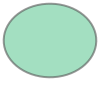

In [10]:
buffer_5[0]

In [44]:
m = folium.Map((gdf.latitude[0], gdf.longitude[0]), max_zoom=20, zoom_start=12)
folium.GeoJson(buffer_5[0]).add_to(m)
m

<mark>How to draw all buffers in one map?</mark>
---leave for later

In [12]:
m = folium.Map((gdf.latitude[1], gdf.longitude[1]), max_zoom=20, zoom_start=12)
folium.GeoJson(buffer_5[1]).add_to(m)
m

# 3.  Select sa1 Income Data inside the Buffer

We use sa1_med_income dataset as discovered in the catchment_area notebook. <br>
First load the sa1_med_income dataset.

In [14]:
gpd.read_file('sa1_med_income.geojson')

,id,sa1_main16,sa1_7dig16,median_age_persons,median_mortgage_repay_monthly,median_tot_prsnl_inc_weekly,median_rent_weekly,median_tot_fam_inc_weekly,average_num_psns_per_bedroom,median_tot_hhd_inc_weekly,average_household_size,geometry
0,sa1_g02_selected_medians_and_averages_census_2...,50701125905,5125905,29,1935,862,400,2083,0.7,2070,2.9,"MULTIPOLYGON (((115.82094 -32.13599, 115.82094..."
1,sa1_g02_selected_medians_and_averages_census_2...,10106154228,1154228,40,2290,980,250,2339,0.8,1989,2.7,"MULTIPOLYGON (((148.89686 -34.87468, 148.89754..."
2,sa1_g02_selected_medians_and_averages_census_2...,50701125911,5125911,33,2612,1077,486,2760,0.8,2591,3.2,"MULTIPOLYGON (((115.81278 -32.13580, 115.81297..."
3,sa1_g02_selected_medians_and_averages_census_2...,50702116519,5116519,40,1733,831,300,2036,0.8,1231,1.8,"MULTIPOLYGON (((115.77499 -32.04945, 115.77497..."
4,sa1_g02_selected_medians_and_averages_census_2...,11201124210,1124210,73,0,0,0,0,0.0,0,2.0,"MULTIPOLYGON (((153.59891 -28.80611, 153.59893..."
...,...,...,...,...,...,...,...,...,...,...,...,...
57485,sa1_g02_selected_medians_and_averages_census_2...,50701116123,5116123,29,2500,1065,478,2422,0.8,2374,3.2,"MULTIPOLYGON (((115.84976 -32.16663, 115.84987..."
57486,sa1_g02_selected_medians_and_averages_census_2...,50702116407,5116407,47,2184,858,495,2535,0.8,1697,2.5,"MULTIPOLYGON (((115.75808 -32.04396, 115.75806..."
57487,sa1_g02_selected_medians_and_averages_census_2...,50701116309,5116309,37,1733,815,380,2026,0.7,1696,2.7,"MULTIPOLYGON (((115.82048 -32.11480, 115.82111..."
57488,sa1_g02_selected_medians_and_averages_census_2...,50701125901,5125901,35,1870,852,368,1946,0.7,1718,2.3,"MULTIPOLYGON (((115.79377 -32.17718, 115.79378..."


In [15]:
sa1_med_income = gpd.read_file('sa1_med_income.geojson')

Dropping rows from 'sa1_med_income' dataframe wherethe columns 'median_tot_fam_inc_weekly' have value 0

In [45]:
sa1_med_income= sa1_med_income[sa1_med_income['median_tot_fam_inc_weekly'] != 0]

In [46]:
sa1_med_income

,id,sa1_main16,sa1_7dig16,median_age_persons,median_mortgage_repay_monthly,median_tot_prsnl_inc_weekly,median_rent_weekly,median_tot_fam_inc_weekly,average_num_psns_per_bedroom,median_tot_hhd_inc_weekly,average_household_size,geometry
0,sa1_g02_selected_medians_and_averages_census_2...,50701125905,5125905,29,1935,862,400,2083,0.7,2070,2.9,"MULTIPOLYGON (((115.82094 -32.13599, 115.82094..."
1,sa1_g02_selected_medians_and_averages_census_2...,10106154228,1154228,40,2290,980,250,2339,0.8,1989,2.7,"MULTIPOLYGON (((148.89686 -34.87468, 148.89754..."
2,sa1_g02_selected_medians_and_averages_census_2...,50701125911,5125911,33,2612,1077,486,2760,0.8,2591,3.2,"MULTIPOLYGON (((115.81278 -32.13580, 115.81297..."
3,sa1_g02_selected_medians_and_averages_census_2...,50702116519,5116519,40,1733,831,300,2036,0.8,1231,1.8,"MULTIPOLYGON (((115.77499 -32.04945, 115.77497..."
5,sa1_g02_selected_medians_and_averages_census_2...,50701126008,5126008,42,1750,808,538,2360,0.7,2113,2.8,"MULTIPOLYGON (((115.84905 -32.09914, 115.84889..."
...,...,...,...,...,...,...,...,...,...,...,...,...
57485,sa1_g02_selected_medians_and_averages_census_2...,50701116123,5116123,29,2500,1065,478,2422,0.8,2374,3.2,"MULTIPOLYGON (((115.84976 -32.16663, 115.84987..."
57486,sa1_g02_selected_medians_and_averages_census_2...,50702116407,5116407,47,2184,858,495,2535,0.8,1697,2.5,"MULTIPOLYGON (((115.75808 -32.04396, 115.75806..."
57487,sa1_g02_selected_medians_and_averages_census_2...,50701116309,5116309,37,1733,815,380,2026,0.7,1696,2.7,"MULTIPOLYGON (((115.82048 -32.11480, 115.82111..."
57488,sa1_g02_selected_medians_and_averages_census_2...,50701125901,5125901,35,1870,852,368,1946,0.7,1718,2.3,"MULTIPOLYGON (((115.79377 -32.17718, 115.79378..."


Before any geospatial manipulation, we need to make sure 'buffer_5' and 'sa1_med_income' use same coordinate system. 

In [16]:
buffer_5.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
sa1_med_income.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Islands, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.56, 173.35, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As you can see, 'buffer_5' use WGS 84 and 'sa1_med_income' use GDA94. We need to transform the coordinates to the same system for further manipulation. For more details, please find it here: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html

In [18]:
pp = buffer_5.geometry.to_crs('EPSG:4283')

In [20]:
pp.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Islands, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.56, 173.35, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [47]:
test = sa1_med_income.intersects(pp)

/opt/conda/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [24]:
test[test]

Series([], dtype: bool)

In [48]:
test = sa1_med_income.intersects(pp.iloc[0])

In [49]:
test[test]

1727     True
1748     True
2146     True
3462     True
3468     True
         ... 
54196    True
54197    True
54217    True
54218    True
54222    True
Length: 338, dtype: bool

Compare these two codes: `test = sa1_med_income.intersects(pp)` and `test = sa1_med_income.intersects(pp.iloc[0])`. The difference is that `.iloc[0]` provides the index to intersect with which buffer. `.iloc[0]` points out the position is to intersect with the first item in pp series, therefore it successfully identified 354 sa1s inside of the Airport West Shopping centre's 5km zone. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

In [50]:
b = test[test]

In [51]:
frames = [sa1_med_income, test]

In [52]:
result = pd.concat(frames)

In [53]:
b.index

Int64Index([ 1727,  1748,  2146,  3462,  3468,  3469,  3470,  3471,  3473,
             3474,
            ...
            54189, 54190, 54191, 54192, 54193, 54196, 54197, 54217, 54218,
            54222],
           dtype='int64', length=338)

In [54]:
shops_00 = sa1_med_income.loc[b.index]
shops_00

,id,sa1_main16,sa1_7dig16,median_age_persons,median_mortgage_repay_monthly,median_tot_prsnl_inc_weekly,median_rent_weekly,median_tot_fam_inc_weekly,average_num_psns_per_bedroom,median_tot_hhd_inc_weekly,average_household_size,geometry
1727,sa1_g02_selected_medians_and_averages_census_2...,21001123104,2123104,42,1975,872,370,2374,0.9,2021,2.8,"MULTIPOLYGON (((144.90635 -37.73834, 144.90587..."
1748,sa1_g02_selected_medians_and_averages_census_2...,21003143850,2143850,37,2000,401,331,983,0.9,905,2.8,"MULTIPOLYGON (((144.93766 -37.69717, 144.93779..."
2146,sa1_g02_selected_medians_and_averages_census_2...,21003123920,2123920,40,1733,683,388,2042,0.8,1765,2.9,"MULTIPOLYGON (((144.93679 -37.72435, 144.93686..."
3462,sa1_g02_selected_medians_and_averages_census_2...,20603111412,2111412,35,2167,1047,358,2931,0.9,2476,2.9,"MULTIPOLYGON (((144.89179 -37.75419, 144.89293..."
3468,sa1_g02_selected_medians_and_averages_census_2...,20603111405,2111405,41,2167,756,420,2232,0.8,1514,2.4,"MULTIPOLYGON (((144.89754 -37.74127, 144.89756..."
...,...,...,...,...,...,...,...,...,...,...,...,...
54196,sa1_g02_selected_medians_and_averages_census_2...,21005124526,2124526,46,1733,632,251,2088,0.9,1259,2.6,"MULTIPOLYGON (((144.88558 -37.66980, 144.88559..."
54197,sa1_g02_selected_medians_and_averages_census_2...,21005124533,2124533,40,1975,694,327,1696,0.8,1593,2.7,"MULTIPOLYGON (((144.90005 -37.68172, 144.90079..."
54217,sa1_g02_selected_medians_and_averages_census_2...,21005125002,2125002,39,1733,531,330,1375,0.8,1224,2.7,"MULTIPOLYGON (((144.87381 -37.70038, 144.87429..."
54218,sa1_g02_selected_medians_and_averages_census_2...,21005125012,2125012,43,1747,526,321,1562,0.7,1350,2.4,"MULTIPOLYGON (((144.87702 -37.69850, 144.87707..."


In [55]:
m = folium.Map((gdf.latitude[0], gdf.longitude[0]), max_zoom=20, zoom_start=12)
folium.GeoJson(buffer_5[0]).add_to(m)
folium.GeoJson(shops_00).add_to(m)
m

Here we successfully captured sa1s from 'sa1_med_income' that are within the Airport West Shopping centre's 5km buffer zone.

In [56]:
w_00 = shops_00.describe()
w_00

,median_age_persons,median_mortgage_repay_monthly,median_tot_prsnl_inc_weekly,median_rent_weekly,median_tot_fam_inc_weekly,average_num_psns_per_bedroom,median_tot_hhd_inc_weekly,average_household_size
count,338.000000,338.000000,338.000000,338.00000,338.000000,338.000000,338.000000,338.000000
mean,38.902367,1867.133136,663.260355,340.87574,1806.863905,0.855030,1529.026627,2.636391
std,5.519262,364.626719,164.108482,64.24034,500.131661,0.102729,415.569234,0.299368
min,23.000000,0.000000,337.000000,0.00000,519.000000,0.500000,441.000000,1.600000
25%,35.000000,1685.500000,526.500000,321.00000,1416.750000,0.800000,1243.000000,2.500000
50%,39.000000,1852.500000,660.500000,346.00000,1738.000000,0.800000,1460.500000,2.600000
75%,42.000000,2000.000000,772.000000,366.00000,2138.500000,0.900000,1799.500000,2.800000
max,73.000000,3359.000000,1125.000000,572.00000,3531.000000,1.300000,2874.000000,3.400000


This dataset includes rich demographic information, such as median_age, monthly median_mortgage_repay, median personal income, weekly rent payment, weekly median total family income, average number of person per bedroom, average_household_size. Here we choose 'median_tot_fam_inc_weekly'--weekly median total family income as the income variable. 

In [57]:
w = w_00['median_tot_fam_inc_weekly']

In [58]:
w

count     338.000000
mean     1806.863905
std       500.131661
min       519.000000
25%      1416.750000
50%      1738.000000
75%      2138.500000
max      3531.000000
Name: median_tot_fam_inc_weekly, dtype: float64

# try the dataframe loop 
Before running the whole iteration for collecting all shopping centres' buffer zone in step 4, we continue trying a few samples and visualising these samples in a map to check the accuracy. 

In [59]:
test = sa1_med_income.intersects(pp.iloc[1])

In [60]:
b = test[test]

In [61]:
frames = [sa1_med_income, test]

In [62]:
result = pd.concat(frames)

In [103]:
b.index

Int64Index([  589,   612,   630,   631,   632,   633,   634,   635,   636,
              637,
            ...
            50984, 50985, 50987, 50988, 50989, 50991, 50992, 50993, 50994,
            51030],
           dtype='int64', length=231)

In [63]:
shops_01 = sa1_med_income.loc[b.index]
shops_01

,id,sa1_main16,sa1_7dig16,median_age_persons,median_mortgage_repay_monthly,median_tot_prsnl_inc_weekly,median_rent_weekly,median_tot_fam_inc_weekly,average_num_psns_per_bedroom,median_tot_hhd_inc_weekly,average_household_size,geometry
589,sa1_g02_selected_medians_and_averages_census_2...,80101101405,8101405,37,1980,773,300,1770,0.7,1545,2.4,"MULTIPOLYGON (((149.02589 -35.23820, 149.02608..."
612,sa1_g02_selected_medians_and_averages_census_2...,80101100705,8100705,36,2000,1070,425,2732,0.8,2444,2.7,"MULTIPOLYGON (((149.06992 -35.21031, 149.07047..."
630,sa1_g02_selected_medians_and_averages_census_2...,80101100102,8100102,40,2450,1287,451,3444,0.8,2888,2.9,"MULTIPOLYGON (((149.08500 -35.25603, 149.08443..."
631,sa1_g02_selected_medians_and_averages_census_2...,80101100208,8100208,33,1842,1056,355,1928,0.8,1649,1.9,"MULTIPOLYGON (((149.07159 -35.24480, 149.07178..."
632,sa1_g02_selected_medians_and_averages_census_2...,80101100209,8100209,31,1146,467,180,1343,0.9,792,1.8,"MULTIPOLYGON (((149.06922 -35.24394, 149.06920..."
...,...,...,...,...,...,...,...,...,...,...,...,...
50989,sa1_g02_selected_medians_and_averages_census_2...,80101102407,8102407,32,1300,699,271,1609,1.1,1271,2.2,"MULTIPOLYGON (((149.04263 -35.23374, 149.04296..."
50991,sa1_g02_selected_medians_and_averages_census_2...,80101102405,8102405,36,1950,972,398,2031,0.8,1978,2.6,"MULTIPOLYGON (((149.04078 -35.23674, 149.04102..."
50992,sa1_g02_selected_medians_and_averages_census_2...,80101102408,8102408,34,1997,829,299,2025,0.8,1568,2.5,"MULTIPOLYGON (((149.04457 -35.23077, 149.04469..."
50993,sa1_g02_selected_medians_and_averages_census_2...,80101102502,8102502,36,2082,885,423,2265,0.8,2225,2.9,"MULTIPOLYGON (((149.06265 -35.19940, 149.06283..."


<AxesSubplot:>

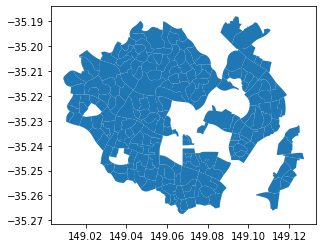

In [64]:
shops_01.plot()

In [66]:
w_01 = shops_01.describe()
w_01

,median_age_persons,median_mortgage_repay_monthly,median_tot_prsnl_inc_weekly,median_rent_weekly,median_tot_fam_inc_weekly,average_num_psns_per_bedroom,median_tot_hhd_inc_weekly,average_household_size
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,38.042056,2003.565421,942.742991,375.799065,2336.457944,0.788785,2009.523364,2.556075
std,7.023977,328.663409,174.907204,91.881848,479.613700,0.121282,496.731313,0.379938
min,21.000000,0.000000,467.000000,0.000000,1180.000000,0.600000,792.000000,1.500000
25%,35.000000,1842.000000,828.250000,335.000000,2039.000000,0.700000,1685.000000,2.325000
50%,37.000000,2000.000000,932.000000,380.000000,2302.500000,0.800000,1978.000000,2.600000
75%,40.750000,2167.000000,1052.000000,425.000000,2603.750000,0.800000,2299.000000,2.800000
max,81.000000,3217.000000,1476.000000,646.000000,3750.000000,1.600000,3457.000000,3.400000


In [107]:
w = w_01['median_tot_fam_inc_weekly']
w

count     231.000000
mean     2164.510823
std       766.046161
min         0.000000
25%      1971.000000
50%      2250.000000
75%      2587.000000
max      3750.000000
Name: median_tot_fam_inc_weekly, dtype: float64

In [67]:
w = w_01['median_tot_fam_inc_weekly']
w

count     214.000000
mean     2336.457944
std       479.613700
min      1180.000000
25%      2039.000000
50%      2302.500000
75%      2603.750000
max      3750.000000
Name: median_tot_fam_inc_weekly, dtype: float64

Here is a comparison before and after deleting rows with value 0 in 'median_tot_fam_inc_weekly'. All the figures significantly increased.

## pp.iloc[2]

count     756.000000
mean     2734.083333
std       985.804358
min         0.000000
25%      2307.250000
50%      2815.000000
75%      3374.000000
max      5250.000000
Name: median_tot_fam_inc_weekly, dtype: float64

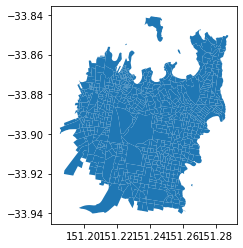

In [108]:
test = sa1_med_income.intersects(pp.iloc[2])
b = test[test]
frames = [sa1_med_income, test]
result = pd.concat(frames)
shops_02 = sa1_med_income.loc[b.index]
shops_02.plot()
w_02 = shops_02.describe()
w = w_02['median_tot_fam_inc_weekly']
w

## pp.iloc[3]

count     249.000000
mean     2280.526104
std       607.349630
min         0.000000
25%      1983.000000
50%      2270.000000
75%      2578.000000
max      4781.000000
Name: median_tot_fam_inc_weekly, dtype: float64

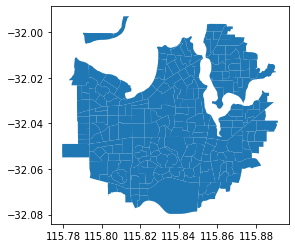

In [109]:
test = sa1_med_income.intersects(pp.iloc[3])
b = test[test]
frames = [sa1_med_income, test]
result = pd.concat(frames)
shops_03 = sa1_med_income.loc[b.index]
shops_03.plot()
w_03 = shops_03.describe()
w = w_03['median_tot_fam_inc_weekly']
w

# 4. whole pp.iloc[] iteration

In [68]:
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_med_income.intersects(value)
    b = test[test]
    frames = [sa1_med_income, test]
    #result = pd.concat(frames)
    shops = sa1_med_income.loc[b.index]
    #shops.plot()
    w = shops.describe()
#    print(w['median_tot_fam_inc_weekly'].to_frame().T)
    output=output.append(w['median_tot_fam_inc_weekly'].to_frame().T,ignore_index=True)
print(output)
 

    count         mean         std     min      25%     50%      75%     max
0   338.0  1806.863905  500.131661   519.0  1416.75  1738.0  2138.50  3531.0
1   214.0  2336.457944  479.613700  1180.0  2039.00  2302.5  2603.75  3750.0
2   727.0  2843.145805  836.732623   495.0  2382.50  2840.0  3392.00  5250.0
3   244.0  2327.258197  516.970364   933.0  2024.25  2289.5  2580.00  4781.0
4   675.0  2091.435556  599.824482   725.0  1625.00  2062.0  2519.50  4041.0
5   349.0  2294.891117  506.003435   900.0  1974.00  2250.0  2609.00  3666.0
6   217.0  1600.258065  343.092631   774.0  1352.00  1579.0  1812.00  3038.0
7   489.0  3051.817996  702.188792   656.0  2531.00  3021.0  3605.00  4795.0
8   441.0  2128.984127  537.946970   807.0  1802.00  2042.0  2392.00  4227.0
9   116.0  1861.818966  434.793016   866.0  1587.50  1762.0  2140.25  3214.0
10  444.0  1996.389640  485.817776   866.0  1669.75  1924.0  2274.00  3750.0
11  431.0  2346.482599  670.895430   537.0  1925.00  2368.0  2722.00  4625.0

# 5. use same method for 1km buffer

In [69]:
# we input the circle size around the shopping centres. 
# Here we choose a 1km zone as an example.1000 
# We use r for the buffer zone radius. The distance is measured in metres, hence 1km is represented as 1000.
r = 1000

In [70]:
buffer_1 = gdf.to_crs(epsg=7855).buffer(r).to_crs(epsg=4326)
buffer_1

0     POLYGON ((144.89661 -37.71419, 144.89653 -37.7...
1     POLYGON ((149.07694 -35.23823, 149.07691 -35.2...
2     POLYGON ((151.26160 -33.89092, 151.26159 -33.8...
3     POLYGON ((115.84453 -32.03656, 115.84420 -32.0...
4     POLYGON ((151.11667 -33.87418, 151.11666 -33.8...
5     POLYGON ((153.11168 -27.50233, 153.11168 -27.5...
6     POLYGON ((115.94695 -32.02162, 115.94662 -32.0...
7     POLYGON ((151.19393 -33.79684, 151.19392 -33.7...
8     POLYGON ((153.04220 -27.38397, 153.04220 -27.3...
9     POLYGON ((153.32878 -27.85455, 153.32878 -27.8...
10    POLYGON ((145.13697 -37.78560, 145.13689 -37.7...
11    POLYGON ((151.23512 -33.94444, 151.23511 -33.9...
12    POLYGON ((145.31513 -38.01726, 145.31505 -38.0...
13    POLYGON ((153.09295 -27.56228, 153.09295 -27.5...
14    POLYGON ((144.37391 -38.14682, 144.37382 -38.1...
15    POLYGON ((153.34616 -27.92551, 153.34617 -27.9...
16    POLYGON ((151.11140 -33.70365, 151.11139 -33.7...
17    POLYGON ((151.11605 -33.96590, 151.11604 -

In [71]:
pp = buffer_1.geometry.to_crs('EPSG:4283')

In [72]:
# whole pp.iloc[] iteration for 1km buffer intersection
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_med_income.intersects(value)
    b = test[test]
    #frames = [sa1_med_income, test]
    #result = pd.concat(frames)
    shops = sa1_med_income.loc[b.index]
    #shops.plot()
    w = shops.describe()
#    print(w['median_tot_fam_inc_weekly'].to_frame().T)
    output=output.append(w['median_tot_fam_inc_weekly'].to_frame().T,ignore_index=True)
print(output)
 

    count         mean         std     min      25%     50%      75%     max
0    13.0  1658.846154  320.683085  1008.0  1511.00  1666.0  1720.00  2160.0
1    20.0  1972.400000  433.929463  1180.0  1691.00  2046.0  2206.75  2874.0
2    65.0  3033.184615  740.849109  1583.0  2399.00  2937.0  3650.00  4659.0
3    20.0  2378.450000  318.441348  1449.0  2201.00  2405.0  2568.00  2937.0
4    56.0  1677.160714  346.246459   971.0  1424.25  1585.5  1922.50  2594.0
5    23.0  2006.000000  413.836485  1321.0  1825.00  2019.0  2195.00  3125.0
6    14.0  1524.857143  228.298003  1230.0  1318.75  1533.0  1577.75  2038.0
7    51.0  2332.725490  677.341305  1321.0  1965.50  2125.0  2646.50  4643.0
8    24.0  1728.375000  352.330972  1054.0  1502.25  1713.0  1881.00  2726.0
9     4.0  1458.750000  260.109432  1104.0  1344.00  1536.0  1650.75  1659.0
10   24.0  1597.166667  261.018518  1193.0  1388.25  1610.5  1685.00  2274.0
11   30.0  1989.466667  495.316738  1287.0  1512.75  2029.0  2431.75  2785.0

# 6. use same method for 10km buffer

In [73]:
# we input the circle size around the shopping centres. 
# Here we choose a 1km zone as an example.10000 
# We use r for the buffer zone radius. The distance is measured in metres, hence 10km is represented as 10000.
r = 10000

In [74]:
buffer_10 = gdf.to_crs(epsg=7855).buffer(r).to_crs(epsg=4326)
buffer_10

0     POLYGON ((144.99866 -37.71597, 144.99787 -37.7...
1     POLYGON ((149.17579 -35.23649, 149.17549 -35.2...
2     POLYGON ((151.35866 -33.88751, 151.35859 -33.8...
3     POLYGON ((115.92610 -32.05883, 115.92281 -32.0...
4     POLYGON ((151.21373 -33.87090, 151.21364 -33.8...
5     POLYGON ((153.20227 -27.49830, 153.20228 -27.5...
6     POLYGON ((116.02859 -32.04382, 116.02532 -32.0...
7     POLYGON ((151.29089 -33.79350, 151.29081 -33.8...
8     POLYGON ((153.13271 -27.38001, 153.13271 -27.3...
9     POLYGON ((153.41962 -27.85034, 153.41966 -27.8...
10    POLYGON ((145.23913 -37.78717, 145.23838 -37.7...
11    POLYGON ((151.33224 -33.94106, 151.33217 -33.9...
12    POLYGON ((145.41762 -38.01868, 145.41688 -38.0...
13    POLYGON ((153.18359 -27.55826, 153.18360 -27.5...
14    POLYGON ((144.47652 -38.14907, 144.47566 -38.1...
15    POLYGON ((153.43706 -27.92127, 153.43710 -27.9...
16    POLYGON ((151.20827 -33.70039, 151.20818 -33.7...
17    POLYGON ((151.21321 -33.96260, 151.21312 -

In [75]:
pp = buffer_10.geometry.to_crs('EPSG:4283')

In [76]:
# whole pp.iloc[] iteration for 10km buffer intersection
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_med_income.intersects(value)
    b = test[test]
    shops = sa1_med_income.loc[b.index]
    #shops.plot()
    w = shops.describe()
#    print(w['median_tot_fam_inc_weekly'].to_frame().T)
    output=output.append(w['median_tot_fam_inc_weekly'].to_frame().T,ignore_index=True)
print(output)
 

     count         mean         std     min      25%     50%      75%     max
0   1348.0  1714.865727  537.125127   474.0  1260.00  1687.0  2130.25  3531.0
1    583.0  2507.789022  571.042763  1079.0  2111.00  2437.0  2810.00  5033.0
2   1708.0  2843.370023  812.444555   495.0  2337.50  2833.0  3424.00  5250.0
3    854.0  2313.088993  698.214564   706.0  1850.50  2215.5  2666.00  5555.0
4   2566.0  2056.419330  768.862800   349.0  1437.00  1930.5  2548.00  4795.0
5   1104.0  2197.428442  595.754627   710.0  1792.00  2155.0  2535.25  4549.0
6    810.0  1907.841975  503.447965   774.0  1542.00  1861.5  2222.00  3666.0
7   1851.0  2876.576445  754.003743   656.0  2338.00  2833.0  3437.00  5250.0
8   1109.0  2275.106402  606.764549   749.0  1875.00  2187.0  2625.00  4549.0
9    309.0  1804.857605  424.504011   739.0  1541.00  1798.0  2050.00  3374.0
10  1538.0  2209.463589  596.303455   575.0  1787.00  2110.0  2531.00  4750.0
11  1652.0  2505.264528  776.839404   495.0  1935.50  2449.0  30

In [165]:
pp

0     POLYGON ((144.94196 -37.71499, 144.94157 -37.7...
1     POLYGON ((149.12087 -35.23747, 149.12072 -35.2...
2     POLYGON ((151.30474 -33.88941, 151.30470 -33.8...
3     POLYGON ((115.88077 -32.04646, 115.87913 -32.0...
4     POLYGON ((151.15981 -33.87273, 151.15977 -33.8...
5     POLYGON ((153.15195 -27.50055, 153.15195 -27.5...
6     POLYGON ((115.98322 -32.03149, 115.98158 -32.0...
7     POLYGON ((151.23703 -33.79536, 151.23698 -33.7...
8     POLYGON ((153.08243 -27.38222, 153.08243 -27.3...
9     POLYGON ((153.36916 -27.85268, 153.36917 -27.8...
10    POLYGON ((145.18238 -37.78631, 145.18199 -37.7...
11    POLYGON ((151.27829 -33.94295, 151.27825 -33.9...
12    POLYGON ((145.36068 -38.01790, 145.36031 -38.0...
13    POLYGON ((153.13323 -27.56050, 153.13324 -27.5...
14    POLYGON ((144.41951 -38.14783, 144.41908 -38.1...
15    POLYGON ((153.38657 -27.92363, 153.38658 -27.9...
16    POLYGON ((151.15446 -33.70221, 151.15441 -33.7...
17    POLYGON ((151.15923 -33.96444, 151.15919 -

In [157]:
w

,median_age_persons,median_mortgage_repay_monthly,median_tot_prsnl_inc_weekly,median_rent_weekly,median_tot_fam_inc_weekly,average_num_psns_per_bedroom,median_tot_hhd_inc_weekly,average_household_size
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
result

,0,average_household_size,average_num_psns_per_bedroom,geometry,id,median_age_persons,median_mortgage_repay_monthly,median_rent_weekly,median_tot_fam_inc_weekly,median_tot_hhd_inc_weekly,median_tot_prsnl_inc_weekly,sa1_7dig16,sa1_main16
0,NaN,2.9,0.7,"MULTIPOLYGON (((115.82094 -32.13599, 115.82094...",sa1_g02_selected_medians_and_averages_census_2...,29.0,1935.0,400.0,2083.0,2070.0,862.0,5125905,50701125905
1,NaN,2.7,0.8,"MULTIPOLYGON (((148.89686 -34.87468, 148.89754...",sa1_g02_selected_medians_and_averages_census_2...,40.0,2290.0,250.0,2339.0,1989.0,980.0,1154228,10106154228
2,NaN,3.2,0.8,"MULTIPOLYGON (((115.81278 -32.13580, 115.81297...",sa1_g02_selected_medians_and_averages_census_2...,33.0,2612.0,486.0,2760.0,2591.0,1077.0,5125911,50701125911
3,NaN,1.8,0.8,"MULTIPOLYGON (((115.77499 -32.04945, 115.77497...",sa1_g02_selected_medians_and_averages_census_2...,40.0,1733.0,300.0,2036.0,1231.0,831.0,5116519,50702116519
4,NaN,2.0,0.0,"MULTIPOLYGON (((153.59891 -28.80611, 153.59893...",sa1_g02_selected_medians_and_averages_census_2...,73.0,0.0,0.0,0.0,0.0,0.0,1124210,11201124210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57485,False,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57486,False,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57487,False,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57488,False,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
type(pp)

geopandas.geoseries.GeoSeries

In [115]:
pp

0     POLYGON ((144.94196 -37.71499, 144.94157 -37.7...
1     POLYGON ((149.12087 -35.23747, 149.12072 -35.2...
2     POLYGON ((151.30474 -33.88941, 151.30470 -33.8...
3     POLYGON ((115.88077 -32.04646, 115.87913 -32.0...
4     POLYGON ((151.15981 -33.87273, 151.15977 -33.8...
5     POLYGON ((153.15195 -27.50055, 153.15195 -27.5...
6     POLYGON ((115.98322 -32.03149, 115.98158 -32.0...
7     POLYGON ((151.23703 -33.79536, 151.23698 -33.7...
8     POLYGON ((153.08243 -27.38222, 153.08243 -27.3...
9     POLYGON ((153.36916 -27.85268, 153.36917 -27.8...
10    POLYGON ((145.18238 -37.78631, 145.18199 -37.7...
11    POLYGON ((151.27829 -33.94295, 151.27825 -33.9...
12    POLYGON ((145.36068 -38.01790, 145.36031 -38.0...
13    POLYGON ((153.13323 -27.56050, 153.13324 -27.5...
14    POLYGON ((144.41951 -38.14783, 144.41908 -38.1...
15    POLYGON ((153.38657 -27.92363, 153.38658 -27.9...
16    POLYGON ((151.15446 -33.70221, 151.15441 -33.7...
17    POLYGON ((151.15923 -33.96444, 151.15919 -

## pp.iloc[6]

count     227.000000
mean     1529.762115
std       469.918338
min         0.000000
25%      1312.000000
50%      1569.000000
75%      1787.500000
max      3038.000000
Name: median_tot_fam_inc_weekly, dtype: float64

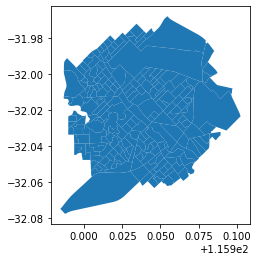

In [121]:
test = sa1_med_income.intersects(pp.iloc[6])
b = test[test]
#frames = [sa1_med_income, test]
#result = pd.concat(frames)
shops_06 = sa1_med_income.loc[b.index]
shops_06.plot()
w_06 = shops_06.describe()
w = w_06['median_tot_fam_inc_weekly']
w

## pp.iloc[7]

count     509.000000
mean     2931.903733
std       908.804757
min         0.000000
25%      2457.000000
50%      2957.000000
75%      3583.000000
max      4795.000000
Name: median_tot_fam_inc_weekly, dtype: float64

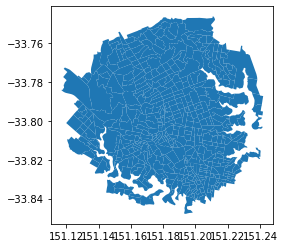

In [122]:
test = sa1_med_income.intersects(pp.iloc[7])
b = test[test]
shops_07 = sa1_med_income.loc[b.index]
shops_07.plot()
w_07 = shops_07.describe()
w = w_07['median_tot_fam_inc_weekly']
w

## pp.iloc[8]

In [123]:
test = sa1_med_income.intersects(pp.iloc[8])
b = test[test]
shops_08 = sa1_med_income.loc[b.index]
w_08 = shops_08.describe()
w = w_08['median_tot_fam_inc_weekly']
w

count     457.000000
mean     2054.446389
std       657.801353
min         0.000000
25%      1783.000000
50%      2025.000000
75%      2384.000000
max      4227.000000
Name: median_tot_fam_inc_weekly, dtype: float64

In [124]:
# Append one or more rows of another dataframe
#
df1 = pd.DataFrame['median_tot_fam_inc_weekly']
#
# Append a dataframe
#
w = w.append(df1)

TypeError: 'type' object is not subscriptable

In [127]:
df = pd.DataFrame(w) 
print(df) 

       median_tot_fam_inc_weekly
count                 457.000000
mean                 2054.446389
std                   657.801353
min                     0.000000
25%                  1783.000000
50%                  2025.000000
75%                  2384.000000
max                  4227.000000


In [ ]:
# Append one or more rows of another dataframe
#
df1 = pd.DataFrame({
    "Mathematics": [92],
    "Science": [95]
}, index=["Snehal"])
#
# Append a dataframe
#
df = df.append(df1)